
<img align="left" style="padding-right:100px;" src="http://pvexpect.com/Driftsledelse/Dagligvarer/nmbu.png">

  **Digital Driftsledelse - IND210**

 Jesper Ørntoft Frausig, 2021


<!--NAVIGATION-->
< [Forord:](https://colab.research.google.com/github/Digitaldriftsledelse/Driftsledelse/blob/master/IND210/Data/2_Dataforst%C3%A5else.ipynb) | [Dataforståelse:](https://colab.research.google.com/github/Digitaldriftsledelse/Driftsledelse/blob/master/IND210/Data/2_Dataforst%C3%A5else.ipynb)  | [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb) >

#Øvelse - Egenskaber og attributer


**[Introduksjon](#Introduksjon)**
- [Trin 1](#Trin_1) - Last ned bibliotekene
- [Trin 2](#Trin_2) - Udpak bibliotek
- [Trin 3](#Trin_3) - Installere automatisering av datainnsamling
- [Trin 4](#Trin_4) - Initialisere Selenium
- [Trin 5](#Trin_5) - Identisifere sidetal
- [Trin 6](#Trin_6) - Iterer gjennom sidene
- [Trin 7](#Trin_7) - Overbelast ikke server
- [Trin 8](#Trin_8) - Strukture den innsamlet data

**[Hva har jeg lært](#lærdom)**

- [integer](#integer)
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


<a name="Introduksjon"></a>

#**Introduksjon**

Vi henter data fra nettstedet for leverandører på forskjellige adresser, og lagrer dem i en database.


> Hva vil du lære i følgende øvelse:
* [ ] Hvordan du laster ned biblioteker
* [ ] Hvordan du trekker ut biblioteker
* [ ] Hvordan du installerer og automatiserer datainnsamling
* [ ] Hvordan du initialiserer Selenium
* [ ] Hvordan du identifiserer nettobjekter
* [ ] Hvordan du ikke overbelaster webserveren
* [ ] Hvordan du strukturerer innsamlede data

<a name="Trin_1"></a>
##**Trin 1** - Last ned bibliotekene


Vi bruker funksjonen til at hente biblioteket [hent ekstern data](#wget) )


In [ ]:
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip

<a name="Trin_2"></a>

##**Trin 2**- Udpak bibliotek

Benyt `unzip` til at pakke ut biblioteket (Sjekk vennligst [udpak bibliotek](#unzip) )

In [ ]:
!unzip chromedriver_linux64

<a name="Trin_3"></a>

##**Trin 3** -  Installere automatisering av datainnsamling



Derefter installere vi Selenium  (vennligst sjekk [selenium](#selenium) ) og importere bibliotekket (vennligst sjekk [Hent bibliotekker](#Hent_bibliotekker_med_verktøyer) ),

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 163 kB in 2s (76.4 kB/s)
Reading


<a name="Trin_4"></a>

##**Trin 4** - Initialisere Selenium


Deretter initialisere vi Selenium (vennligst sjekk [selenium](#selenium) )

In [ ]:

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://portal.debio.no/certsearch/no")
#print(browser.page_source)  # results


Vi lager en for løkke (sjekk vennligst [telle gjennom rader](#telle_gjennom_rader)).

Vi lager en for-løkke for deler av sidene.

```
for n in range(0,int(antal_sider)):
```



<a name="Trin_5"></a>

##**Trin 5** - Identisifere sidetal


Vi identifiserer sidetallene  (sjekk vennligst [lokalisere objekt](#lokalisere_objekt)).





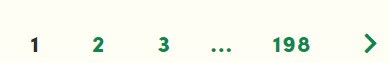


Henvisningen er som følger
```
browser.find_element_by_xpath("/html/body/app/div/ng-component/div/div[2]/div/div[3]/div/div/div/fab-certsearch-pagination/div/span["+str(n)+"]").click()

```


<a name="Trin_6"></a>

##**Trin 6** - Iterer gjennom sidene





Ved å bruke en variabel kan vi iterer gjennom sidene og klikke på knappen (sjekk vennligst [lokalisere objekt](#lokalisere_objekt)).
```
 browser.find_element_by_xpath("...["+str(n)+"]...").click()
``` 


<a name="Trin_7"></a>

##**Trin 7** - Overbelast ikke server







Vi ønsker at serveren ikke blir overbelastet ( Sjekk vennligst [håndtere time](#håndtere_tid) )


```
time.sleep(1)
```


##**Trin 8** - Strukture den innsamlet data

Vi deler teksten opp med  "SE SISTE GODKJENNING", slik at hver leverandørs informasjon blir skilt.



Trin 9

Til slutt, legges til informasjon individuelt.


In [ ]:
import pandas as pd
antal_sider = 25 #@param {type:"slider", min:1, max:220, step:1}


#data=browser.find_element_by_class_name("resultWrapper").text

import time
database=[]

#pages=browser.find_element_by_class_name("csPaginatorWrapper").text

#last_page=pages.split()[-1]

for n in range(0,int(antal_sider)):
  try:
    browser.find_element_by_xpath("/html/body/app/div/ng-component/div/div[2]/div/div[3]/div/div/div/fab-certsearch-pagination/div/span["+str(n)+"]").click()
    time.sleep(5)
    print("success - " + str(n))
    data=browser.find_element_by_class_name("resultWrapper").text
    print(data)
    for i, leverandør in enumerate(data.split('SE SISTE GODKJENNING')):
      print(i)
      print(leverandør)
      append_data={}

      leverandører=leverandør.split('\n')
      if i==0:
        try:
          append_data.update({"navn": leverandører[0]})
          append_data.update({"addresse": leverandører[1]})
          append_data.update({"Org_nr": leverandører[2]})
          append_data.update({"Sektor": leverandører[3]})
        except:
          print("index mangler")
      if i>0:
        try:
          append_data.update({"godkjenning": leverandører[1]})
          append_data.update({"navn": leverandører[2]})
          append_data.update({"addresse": leverandører[3]})
          append_data.update({"Org_nr": leverandører[4]})
          append_data.update({"Sektor": leverandører[5]})
        except:
          print("index mangler")
      database.append(append_data)
  except:
    print("no success - " + str(n))
 
leverandør_database=pd.DataFrame(database)



no success - 0
no success - 1
success - 2
A. Nilsson & Co AS Fruktringen Oslo
Håndverksveien 31 , 1405 LANGHUS
Org. nr. 914 653 177
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 02.12.2020 til 30.12.2021
A. Strøm-Larsen AS
Vogtsgt 53 , 0477 OSLO
Org. nr. 933 112 993
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 09.09.2020 til 30.12.2021
A.C. Perch's Thehandel Norge AS
Kirkegata 5 , 0153 OSLO
Org. nr. 914 114 063
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 07.07.2020 til 30.12.2021
Aabakken Guro Karoline
Helgbustadveien 81 , 7243 KVENVÆR
Org. nr. 998 460 573
Foredling, import og omsetning
Økologisk landbruksproduksjon
SE SISTE GODKJENNING
Gyldig fra 02.11.2020 til 30.12.2021
Aalstad Amund
Olsrudvegen 33 , 2322 RIDABU
Org. nr. 992 932 074
Foredling, import og omsetning
Økologisk landbruksproduksjon
SE SISTE GODKJENNING
Gyldig fra 21.10.2020 til 30.12.2021
Aamo Jan Arvid
Vangrøftdalsveien 129 , 2550 OS I ØSTERDALEN
Org. nr. 993 019 410


Til sist kan vi se data over leverandører

In [ ]:
leverandør_database

,navn,addresse,Org_nr,Sektor,godkjenning
0,A. Nilsson & Co AS Fruktringen Oslo,"Håndverksveien 31 , 1405 LANGHUS",Org. nr. 914 653 177,"Foredling, import og omsetning",NaN
1,A. Strøm-Larsen AS,"Vogtsgt 53 , 0477 OSLO",Org. nr. 933 112 993,"Foredling, import og omsetning",Gyldig fra 02.12.2020 til 30.12.2021
2,A.C. Perch's Thehandel Norge AS,"Kirkegata 5 , 0153 OSLO",Org. nr. 914 114 063,"Foredling, import og omsetning",Gyldig fra 09.09.2020 til 30.12.2021
3,Aabakken Guro Karoline,"Helgbustadveien 81 , 7243 KVENVÆR",Org. nr. 998 460 573,"Foredling, import og omsetning",Gyldig fra 07.07.2020 til 30.12.2021
4,Aalstad Amund,"Olsrudvegen 33 , 2322 RIDABU",Org. nr. 992 932 074,"Foredling, import og omsetning",Gyldig fra 02.11.2020 til 30.12.2021
...,...,...,...,...,...
350,Bogen Bjørg,"Hemsedalsvegen 84 , 3550 GOL",Org. nr. 983 448 518,Økologisk landbruksproduksjon,Gyldig fra 09.09.2020 til 30.12.2021
351,Bogshamn Siw-Irene,"Haglandsvn. 145 , 5514 HAUGESUND",Org. nr. 976 942 817,Økologisk landbruksproduksjon,Gyldig fra 09.11.2020 til 30.12.2021
352,Bollingmo Jon,"Sørumsgata 101 , 3517 HØNEFOSS",Org. nr. 969 234 513,Økologisk landbruksproduksjon,Gyldig fra 14.12.2020 til 30.12.2021
353,Bolme Eivind,"Snøan-Strinde 7 , 7288 SOKNEDAL",Org. nr. 970 231 285,Økologisk landbruksproduksjon,Gyldig fra 21.04.2020 til 30.12.2021


Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?

<a name="lærdom"></a>
#**Hva har jeg lært idag?**

> Hva har du lært?
* [x] Hvordan du laster ned biblioteker
* [x] Hvordan du udpakker biblioteker
* [x] Hvordan du installere og automatisere datainnsamling
* [x] Hvordan du initialisere Selenium
* [x] Hvordan du identisifere web objekter
* [x] Hvordan du ikke overbelaster web server
* [x] Hvordan du strukturer innsamlet data

Hva vil du lære i morgen?



<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

#**Begreber**

<a name="Hent_bibliotekker_med_verktøyer"></a>
###**Hent bibliotekker av verktøyer** - `Import` 
- `Import`

Python-kode i en modul får tilgang til koden i en annen modul ved å importere den. 
I Python er en modul en fil i .py-filformat som inneholder Python-kode.

Det mest populære bibliotek til data analyse er pandas. 
Pandas er en data struktur, litt likesom en tabel i Excel med rader og kolonner.

Import funksjonen kombinerer to operasjoner; den søker etter den navngitte modulen - `pandas` - , så binder den modulet til et navn, i dette eksempel `pd`.
Vanligvis foretrekker vi forekortelser, og importere bibliotekker, i forkortet form: `pandas as pd`. Fremover hetter bibliotekket `pd`

```
import pandas as pd
```

Genereltset importer vi funksjoner såledelse
```
import vårfunksjon
```

Alternativet til å importere funksjoner er å definere funksjonen direkte: 
```
def vårfunksjon():
  return x + 2
```


Referenser
* Python for Data Analysis, Wes McKinney, s. 36

**Eksempel** 

Åbning af nettlink med pandas. Filen er i json-format og har innebygde data

In [ ]:
import pandas as pd
pd.read_json("https://platform-rest-prod.ngdata.no/api/FindStore/StoresClosestToMe/1300/?latitude=65.4&longitude=16.8&minnumberofstores=200&maxNumberOfStores=300&maxDistance=2470554")

,distance,store
0,1,"{'id': 7080000918737, 'chainid': 1300, 'name':..."
1,1,"{'id': 7080001110611, 'chainid': 1300, 'name':..."
2,1,"{'id': 7080001100063, 'chainid': 1300, 'name':..."
3,1,"{'id': 7080000032075, 'chainid': 1300, 'name':..."
4,1,"{'id': 7080000001903, 'chainid': 1300, 'name':..."
...,...,...
174,1,"{'id': 7080000003280, 'chainid': 1300, 'name':..."
175,1,"{'id': 7080000062881, 'chainid': 1300, 'name':..."
176,1,"{'id': 7080000748273, 'chainid': 1300, 'name':..."
177,1,"{'id': 7080001007157, 'chainid': 1300, 'name':..."


**Spørsmål:**
>* Hvad betyder `import`?
>* Må vi vete på forhånd hvilke bibliotekker, som vi vil anvende, eller finder python selv ut av det?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>



<a name="wget"></a>

###**Hent ekstern data**



GNU Wget er et bibliotek for å hente filer ved hjelp av de mest brukte Internett-protokollene:


| Forkortelse | Navn                               | Beskrivelse                                                                     |
|-------------|------------------------------------|---------------------------------------------------------------------------------|
| HTTP        | Hypertext Transfer Protocol        | En protokol er en standard for utveksling av kommunikation i browseren          |
| HTTPS       | Hypertext Transfer Protocol Secure | HTTPS er en sikrere utgave av HTTP                                              |
| FTP         | File Transfer Protocol             | klient-server-protokoll som brukes til å overføre filer mellom to datamaskiner. |
| FTPS        | File Transfer Protocol Secure      | FTPS er en sikrere utgave av FTP                                                |

Online kilde:
* https://www.gnu.org/software/wget/
* [wget bibliotek](https://pypi.org/project/wget/)




> **Spørsmål**
* Hvad er forskjellen på `HTTP` og `FTP`?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>






<a name="unzip"></a>


###**Udpak fil** -  `unzip`

Unzip-modullet i python er et bibliotek for lesing av zip-filer. 

Zip er en vanlig type filkomprimering. ZIP er arkivfilformatet som støtter tapsfri datakomprimering. En tapsfri komprimering betyder å komprimeringsalgoritmen muligjøre at originaldataene blir fullstendig rekonstruert fra komprimerte data. En ZIP-fil inneholder en eller flere komprimerte filer, og tilladergjøre store filer mindre og sammenholde relaterte filer 
Zip filder benyttes for å redusere størrelsen på data som overføres over Internett.




> **Spørsmål**
* Hvad er forskjellen på `HTTP` og `FTP`?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>







<a name="integer"></a>
###**integer** - 'int()'


Det er fire numeriske typer i Python:

| Kommando | Betydning | Beskrivelse                                              |
|----------|-----------|----------------------------------------------------------|
| int      | integer   | positive eller negative heltall uten desimaltegn. Signeret helttal i området [-2147483648 til 2147483647]  |
| int      | integer   | lange heltall, de kan også vises i oktal og heksadesimal |
| float    | float     | kontinuel reelle verdier. representerer reelle tall og er skrevet med et desimaltegn som deler heltall og brøkdeler. Flyter kan også være i vitenskapelig notasjon                                |
| complex  | complex   | komplekse tall                                           |




Variabler av numeriske typer opprettes når du angiver en verdi til variablen.



s. 35 Python Data Science Handbook

s. 80-81, Python for Finance


s. 38-39 Python for Data Analysis - Numeric

<a name="print"></a>
###**print** - `print()`


Funksjonen for utskrift () skriver ut den angitte meldingen til skjermen eller annen standard utdataenhet.

Meldingen kan være en streng eller et hvilket som helst annet objekt, objektet blir konvertert til en streng før det skrives til skjermen.



print("success - " + str(n))



<a name="string"></a>
###**string** - 'str()'

print("success - " + str(n))



<a name="sammenleg_tekst_string"></a>
###**sammenleg tekst** - `str() + str()`
print("success - " + str(n))

s. 84-86, Python for Finance
s. 351-355, a primer on scientific programming with python

s. 39-42 Python for Data Analysis



<a name="opret_dictionary"></a>
###**opret dictionary** - `data={}`



Ordbøker og lister har følgende egenskaper:

* Begge er mutable.
* Begge er dynamiske. De kan vokse og krympe etter behov.
* Begge kan hekkes. En liste kan inneholde en annen liste. En ordbok kan inneholde en annen ordbok. En ordbok kan også inneholde en liste, og omvendt.
Ordbøker skiller seg fra lister først og fremst i hvordan elementer er tilgjengelige:

Listeelementer er tilgjengelige via deres posisjon i listen, via indeksering.
Ordbokselementer er tilgjengelige via taster.


Et dictionary har en rekke funksjoner, som kan benyttes. 

I dette eksempel, `.update()` hvor et navn på en leverandører spesifiseres.

*  append_data.update({"navn": leverandører[0]})

Yderligere metoder er angitt forneden (vanligvis benyttes kun et fåtall av funksjoner):

| Metode              | på norsk      | Beskrivelse                                                                                                                                                     |
|---------------------|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| clear()             | ryd           | Fjerner alle elementene fra ordboken.                                                                                                                           |
| copy()              | kopier        | Returnerer en grunne kopi av ordboken.                                                                                                                          |
| fromkeys(seq[, v])  | fra nøgleord  | Returnerer en ny ordbok med nøkler og verdi lik v                                                                                                               |
| get(key[,d])        | hent          | Returnerer verdien av nøkkelen. Hvis nøkkelen ikke eksisterer, returnerer d                                                                                     |
| items()             | elementer     | Returner et nytt objekt av ordbokens elementer i (nøkkel, verdi) format.                                                                                        |
| keys()              | nøkler        | Returnerer et nytt objekt av ordbokens nøkler.                                                                                                                  |
| pop(key[,d])        | fjern         | Fjerner elementet med tasten og returnerer verdien eller d hvis tasten ikke blir funnet. Hvis d ikke er gitt, og nøkkelen ikke blir funnet, hever den KeyError. |
| popitem()           | funnet        | Fjerner og returnerer et vilkårlig element (nøkkel, verdi). Hever KeyError hvis ordboken er tom.                                                                |
| setdefault(key[,d]) | sett standard | Returnerer den tilsvarende verdien hvis nøkkelen er i ordboken. Hvis ikke, setter du inn nøkkelen med verdien d og returnerer d                                 |
| update([other])     | oppdatering   | Oppdaterer ordboken med nøkkel- / verdiparene fra andre overskrivende eksisterende nøkler.                                                                      |
| values()            | verdier       | Returnerer et nytt objekt av ordbokens verdier                                                                                                                  |






s. 333-351, a primer on scientific programming with python

s. 92-93, Python for Finance



s. 61- 65 Python for Data Analysis


<br></br>
>**Spørsmål:**
>* Hva er forskjellen på et dictionary og en liste?
>* Kan du tenke på et eksempel hvor vi bruker dictionary eller lister i hverdagen?
>* Er en telefon liste en liste eller et dictionary?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>



s. 46-47 Python for Data analysis

<a name="selenium"></a>


###**Selenium** - `Selenium`

Selenium er et automatisert testrammeverk som brukes til å validere webapplikasjoner på tvers av forskjellige nettlesere og plattformer.
Selenium krever en driver for å grensesnitt med den valgte nettleseren.
Selenium.webdriver-modulen inneholder alle WebDriver-implementeringene. For tiden understøttes WebDriver-implementeringer: Firefox, Chrome og IE 






<a name="lokalisere_objekt"></a>

###**Lokalisere objekt** - `browser.find_element_by_xpath`

- `browser.find_element_by_xpath`

Elementer på en nettside, kan f.eks. idensifiseres ved å `id`, `navn`, `sti`, eller `klasse`:

* find_element_by_id
* find_element_by_name
* find_element_by_xpath
* find_element_by_class_name

I dette eksempel, vil en knap blive idensifiseret ved å en sti. `XPath` bruker stien til elementet for å velge element eller elementer i et XML-dokument. Elementet velges ved å følge en sti eller trinn.
Elementet på en nettside kan idensifiseres sådan:
```
browser.find_element_by_xpath("/html/body/main/div[4]/div/div/div/div[2]/div/section[3]/div/button").click() 
```










Først må websiden `inspiseres`. Dette gjøre ved å højre-klikke å åpne "inspisere element"-fanblad

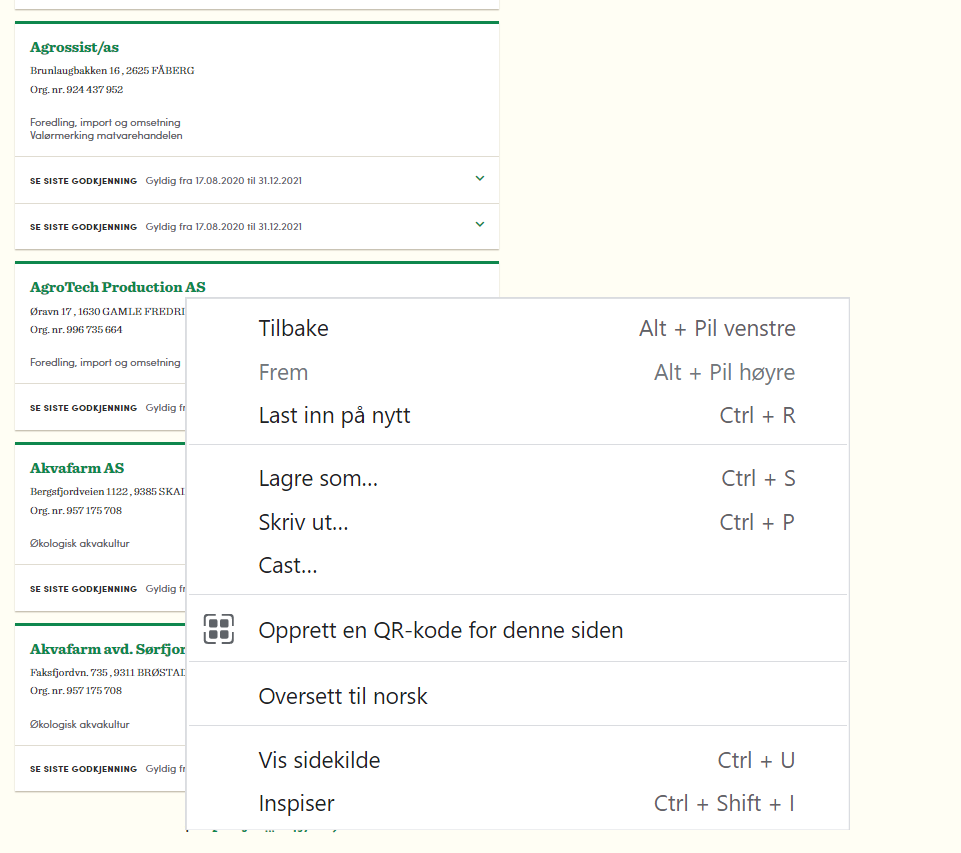

Dernest idensifiseret objektet, som du ønsker å benytte. Du højre-klikker på kildekoden, og kopier den fulde stil `Copy full Xpath`

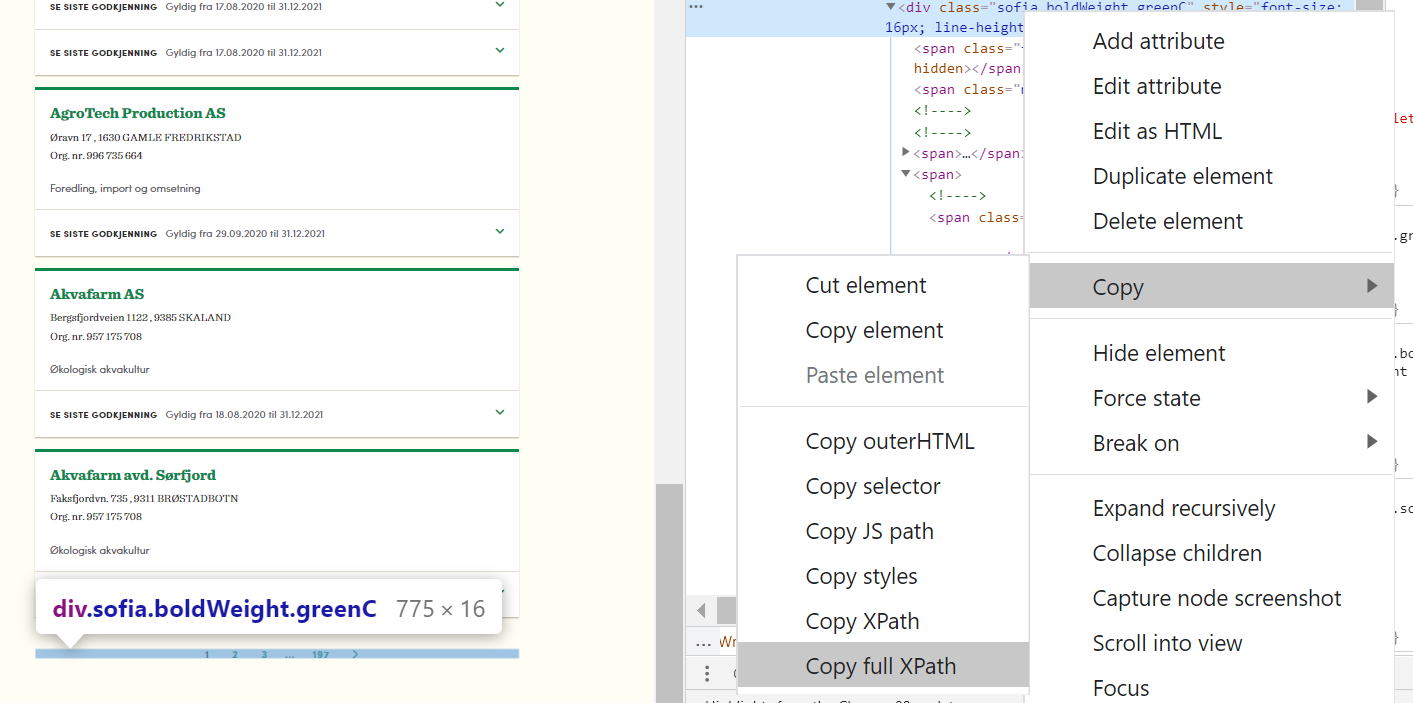

Dette er resultatet `/html/body/app/div/ng-component/div/div[2]/div/div[3]/div/div/div/fab-certsearch-pagination/div/span["+str(n)+"]`.
Hvor str(n) angiver en bestemt sidetall

Ved å tilføje `.click() `, kan du trykke på knappen, som du har idensifisert.

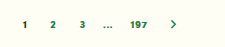

> **Spørsmål**
* Hvorfor vil du automatisere hentning av data fremfor å hente det manuelt?
* Er det alltid fornuftigt å automatisere datahenting, selv ved små datasett?
* Hvis du henter data som involverer mennesker, hva trenger du å være klar over?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>





<a name="håndtere_tid"></a>
###**Håndtere tid** - `import time`

For å håndtere tidsrelaterte oppgaver, benytter Python et modul som heter tid eller `time`. Vi  må først importere modulen, for å bruke funksjoner som er definert i modulen.

```
import time
```

Funksjonen `time()` returnerer antall sekunder som har gått siden initialisering av `time`.  Dette gjøre ved å bruke et flytende nummer - `float` - som representerer antall sekunder siden initialisering av `time`.

F.eks. kan funksjoen brukes til å undgå at overbelaste en serveren, mens vi venter på data




Importer tid

In [ ]:
import time

Afvent tid

In [ ]:
print("start tid")
time.sleep(5)
print("stop tid")

start tid
stop tid


> **Spørsmål**
* Når python eksevere kode hurtigere enn en server kan levere data, hvilke utfordringer oppstår derved?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>






###**Find_element_by_class_name ()**

Seleniums Python-modul er bygget for å utføre automatisert testing med Python. Selen Python-bindinger gir en enkel API for å skrive funksjonelle / akseptanstester ved hjelp av Selen WebDriver. Etter at du har installert selen og sjekket ut - Navigere i lenker ved hjelp av get-metoden, vil du kanskje spille mer med Selen Python. Etter at man har åpnet en side ved hjelp av selen, kan det være lurt å klikke på noen knapper automatisk eller fylle ut et skjema automatisk eller en slik automatisert oppgave.

- hvordan man kan hente eller finne elementer på en webside ved hjelp av lokaliseringsstrategier for Selenium Driver

<a name="telle_gjennom_rader"></a>

###**telle gjennom rader** - `for i in range(x,y):`

En sløyfe brukes til handlinger som skal gjentas flere ganger. Du kan velge et gitt antall ganger eller gjenta det til et mål er nådd

Funksjonen spesifiseres vanligvis som følger:

- `For i in loop`






En for loop brukes til å gjenta over en sekvens (det vil si en liste, en tuple, en ordbok, et sett eller en streng).

For eksempel med for loop kan vi skrive ut et sett med utsagn, en gang for hvert element i en liste, tuple, sett osv.

Referenser:

* Python for Finance, Yves Hilpisch, side 90-91 
* Python for Data analysis, Wes McKinney, side 47-49 


Først lager vi en liste

In [ ]:
series=list(range(1,10))


Deretter bruker vi en sløyfe for å skrive ut innholdet i listen

In [ ]:
for i in range(0,len(series)):
  print(i)

0
1
2
3
4
5
6
7
8




> **Spørsmål**
> * Kan du tenke deg prosesser fra hverdagen, der du bruker en loop-tilnærming for å løse et problem?
> * Hvorfor ønsker vi å behandle ett element om gangen i stedet for hele serien?

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


| **Forberede verktøy og data** | **Data formater** | Data strukturer | **Omdan data**      | **tilføj/fjern data**  | Se udsnitt av data | Admin      | **Vis data**         | **Verktøyer**         |
|-------------------------------|-------------------|-----------------|---------------------|------------------------|--------------------|------------|----------------------|-----------------------|
| hent bibliotekker             | download website  |  integer (int)  | split tekst         | serie                  | for løkke          | time sleep | * Les øverste rekker | selenium              |
| udpak filer                   |                   | tekst (str)     | konverter til tekst | gem download knap      |                    | hvis       | print data           | opret virtuel browser |
| installer                     |                   | dictionary      |                     | sammenleg tekst string |                    |            |                      | find web objekt       |
| initialisere                  |                   |                 |                     | oppdatere dictionary   |                    |            |                      | klik på web objekt    |
| håndtere feil                 |                   |                 |                     |                        |                    |            |                      | lokaliser knap        |